In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
import pandas as pd


0 basic figure style

In [3]:
import matplotlib.pyplot as plt

def basic_figure_style():
    SMALL_SIZE = 5*4                                       
    MEDIUM_SIZE = 8*2
    BIGGER_SIZE = 10*4

    plt.rc('font', size=MEDIUM_SIZE, family='serif')          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)                     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)                    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=MEDIUM_SIZE, direction='out')    # fontsize of the tick labels
    plt.rc('ytick', labelsize=MEDIUM_SIZE, direction='out')    # fontsize of the tick labels
    plt.rc('legend', fontsize=MEDIUM_SIZE)                    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)                  # fontsize of the figure title
    plt.rc('lines', linewidth=1) 
    plt.rc('axes', grid=True) #
    plt.rc('grid', alpha=0.7) #
    plt.rc('xtick', top=True)
    plt.rc('ytick', right=True)
    plt.rc('axes.formatter', use_mathtext=True, min_exponent=4, useoffset=False)
    plt.rc('figure', figsize='6, 6')                         # size of the figure, used to be '4, 3' in inches

    # Set LaTeX rendering to True
    plt.rc('text', usetex=False)

basic_figure_style()


# 1 T,n,Z profiles, for Z  

In [4]:
#### set paths ####
rootdir = f'/Users/eusracenorth/Documents/work/XGAP-ABUN/alldata'
savepath = f'{rootdir}/figs/T_distribution'
datapath = f'{rootdir}/dats'
os.makedirs(f'{savepath}', exist_ok=True)

#### load data ####

fran_path = f'{rootdir}/../Francois'
df_xcop = {}
f_xcop = pd.read_csv(f'{fran_path}/xcop.txt', skiprows=5, header=None, delim_whitespace=True)
df_xcop['r'] = f_xcop.iloc[:,0]
df_xcop['Fe'] = f_xcop.iloc[:,1]
df_xcop['Fe_lo'] = f_xcop.iloc[:,2]
df_xcop['Fe_hi'] = f_xcop.iloc[:,3]
df_cheers = {}
f_cheers = pd.read_csv(f'{fran_path}/cheers.txt', skiprows=5, header=None, delim_whitespace=True)
df_cheers['r'] = f_cheers.iloc[:,0]
df_cheers['Fe'] = f_cheers.iloc[:,1]
df_cheers['Fe_lo'] = f_cheers.iloc[:,2]
df_cheers['Fe_hi'] = f_cheers.iloc[:,3]
df_lovasari = {}
f_lovasari = pd.read_csv(f'{fran_path}/lovasari.txt', skiprows=5, header=None, delim_whitespace=True)
df_lovasari['r'] = f_lovasari.iloc[:,0]
df_lovasari['Fe'] = f_lovasari.iloc[:,1]
df_lovasari['Fe_lo'] = f_lovasari.iloc[:,2]
df_lovasari['Fe_hi'] = f_lovasari.iloc[:,3]

r500_dict = {'ID9647':9.17026, 'ID828':10.2579, 'ID3460':7.59404, 'RGH80':7.35216}
prof_3460 = pd.read_csv(f'{datapath}/SDSSTG3460_annuli_mypar_GADEM.csv')
prof_80 = pd.read_csv(f'{datapath}/RGH80_annuli_mypar_GADEM.csv')
prof_828 = pd.read_csv(f'{datapath}/SDSSTG828_annuli_mypar_GADEM.csv')
prof_9647 = pd.read_csv(f'{datapath}/SDSSTG9647_annuli_mypar_GADEM.csv')

file_1T = f'{datapath}/R500-01_1T_xspec.csv'
file_GD = f'{datapath}/R500-01_GDEM_xspec.csv'
file_Tavg = f'{datapath}/GDEM_Tavg_xspec.csv'
df_1T = pd.read_csv(file_1T)
df_GD = pd.read_csv(file_GD)
df_Tavg = pd.read_csv(file_Tavg)


27
0.6284587429219383 1.808389322763863 26
chi is 11.405742230611343


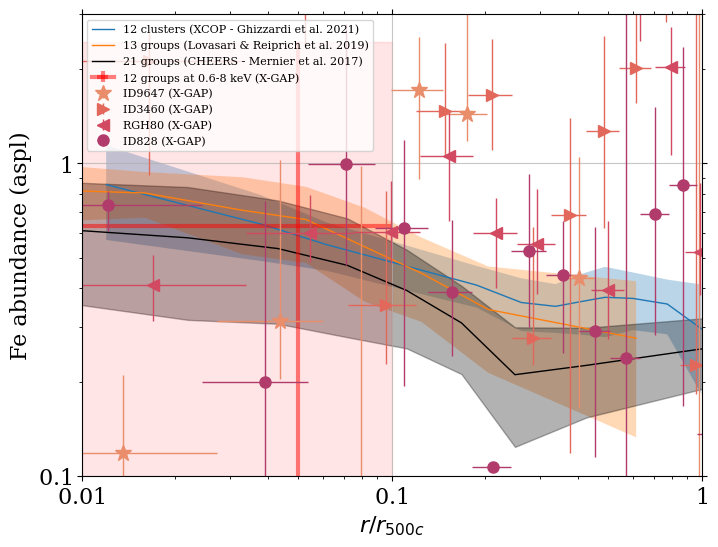

In [79]:
fig, ax = plt.subplots(figsize = (8,6))

# literatures
plt.plot(df_xcop['r'], df_xcop['Fe'], label = '12 clusters (XCOP - Ghizzardi et al. 2021)')
plt.fill_between(df_xcop['r'], df_xcop['Fe_lo'], df_xcop['Fe_hi'], alpha = 0.3)
plt.plot(df_lovasari['r'], df_lovasari['Fe'], label = '13 groups (Lovasari & Reiprich et al. 2019)')
plt.fill_between(df_lovasari['r'], df_lovasari['Fe_lo'], df_lovasari['Fe_hi'], alpha = 0.3)
plt.plot(df_cheers['r'], df_cheers['Fe'], c = 'k', label = '21 groups (CHEERS - Mernier et al. 2017)')
plt.fill_between(df_cheers['r'], df_cheers['Fe_lo'], df_cheers['Fe_hi'], color = 'k', alpha = 0.3)

# XGAP 0.1R500
# exclude bad fit
fil1 = abs(df_GD['cstat']/df_GD['dof'] - 1)<0.3

# exclude flared sources
flared = ['SDSSTG22635', 'SDSSTG1695', 'SDSSTG15776', 'SDSSTG35976', 'SDSSTG4047', 'SDSSTG3513']
fil3 = fil1 & (~np.isin(df_GD['reg'], flared))
print(np.sum(fil2))

# # exclude insane values
# fil3 = fil2 & (df_GD['Z-value'] < 2) & (df_GD['Z-value'] > 0.1)
# print(np.sum(fil3))

temp_lo = [0.6]
temp_hi = [8]
Zwei_lst = []
Zvar_lst = []
for i in range(len(temp_lo)):
    fil = fil3 & (df_Tavg['Tavg']<temp_hi[i]) & (df_Tavg['Tavg']>temp_lo[i])
    yerr = np.mean([df_GD['Z-errlo'][fil],df_GD['Z-errhi'][fil]], axis=0)
    Zwei = np.sum(df_GD['Z-value'][fil] * 1/yerr**2) / np.sum(1/yerr**2)
    # Zwei = np.mean(df_GD['Z-value'][fil])
    Zvar = np.sqrt(np.sum((df_GD['Z-value'][fil] - Zwei)**2/(np.sum(fil)-1)))
    print(Zwei, Zvar, np.sum(fil))
    # print(df_GD['Z-value'][fil])
    Zwei_lst.append(Zwei)
    Zvar_lst.append(Zvar)
    plt.fill_between([0,0.1], y1 = Zwei-Zvar, y2 = Zwei+Zvar, color = 'r',  alpha = 0.1)
    plt.errorbar(0.05, Zwei, xerr = 0.05, yerr = Zvar, label = f'12 groups at {temp_lo[i]}-{temp_hi[i]} keV (X-GAP)', color = 'r', alpha = 0.5, linewidth = 3)
    chi = np.sqrt(np.sum((df_GD['Z-value'][fil] - Zwei)**2)/Zwei)
    print(f'chi is {chi}')


# XGAP 4 profiles
import seaborn as sns
cb = sns.color_palette("flare").as_hex()
rmean = np.mean(np.array([prof_9647['rlo'], prof_9647['rhi']]), axis = 0)/r500_dict['ID9647']
rerr = (prof_9647['rhi'] - prof_9647['rlo'])/r500_dict['ID9647']/2
plt.errorbar(rmean, prof_9647['Z-value'], xerr = rerr, yerr = [prof_9647['Z-errlo'], prof_9647['Z-errhi']], color = cb[0], fmt = '*', markersize = 12, label = 'ID9647 (X-GAP)')
rmean = np.mean(np.array([prof_3460['rlo'], prof_3460['rhi']]), axis = 0)/r500_dict['ID3460']
rerr = (prof_3460['rhi'] - prof_3460['rlo'])/r500_dict['ID3460']/2
plt.errorbar(rmean, prof_3460['Z-value'], xerr = rerr, yerr = [prof_3460['Z-errlo'], prof_3460['Z-errhi']], color = cb[1], fmt = '>',markersize = 8, label = 'ID3460 (X-GAP)')
rmean = np.mean(np.array([prof_80['rlo'], prof_80['rhi']]), axis = 0)/r500_dict['RGH80']
rerr = (prof_80['rhi'] - prof_80['rlo'])/r500_dict['RGH80']/2
plt.errorbar(rmean, prof_80['Z-value'], xerr = rerr, yerr = [prof_80['Z-errlo'], prof_80['Z-errhi']],  color = cb[2], fmt = '<', markersize = 8, label = 'RGH80 (X-GAP)')
rmean = np.mean(np.array([prof_828['rlo'], prof_828['rhi']]), axis = 0)/r500_dict['ID828']
rerr = (prof_828['rhi'] - prof_828['rlo'])/r500_dict['ID828']/2
plt.errorbar(rmean, prof_828['Z-value'], xerr = rerr, yerr = [prof_828['Z-errlo'], prof_828['Z-errhi']], color = cb[3], fmt = 'o', markersize = 8, label = 'ID828 (X-GAP)')




plt.ylim(0.1,3)
plt.xlim(0.01,1)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('$r/r_{500c}$')
plt.ylabel('Fe abundance (aspl)')
plt.legend(fontsize = 8)

26
26
0.5336905000000001
Intrinsic scatter, var, staterr 0.40579353633154636, 0.20960879020071205, 0.10144112009254634
0.547718 0.40579353633154636 25
2     0.383190
3     0.272451
4     0.085587
7     1.247110
8     1.366260
9     0.697858
11    1.015270
12    0.598446
13    0.883247
15    0.216419
16    0.903103
18    0.119810
20    1.660190
22    1.414820
23    0.462293
25    0.773344
28    0.123826
29    0.338837
32    0.519663
33    0.547718
34    0.734204
35    0.051721
38    0.404636
41    0.132776
43    0.733124
Name: Z-value, dtype: float64
chi is 3.030622615178484


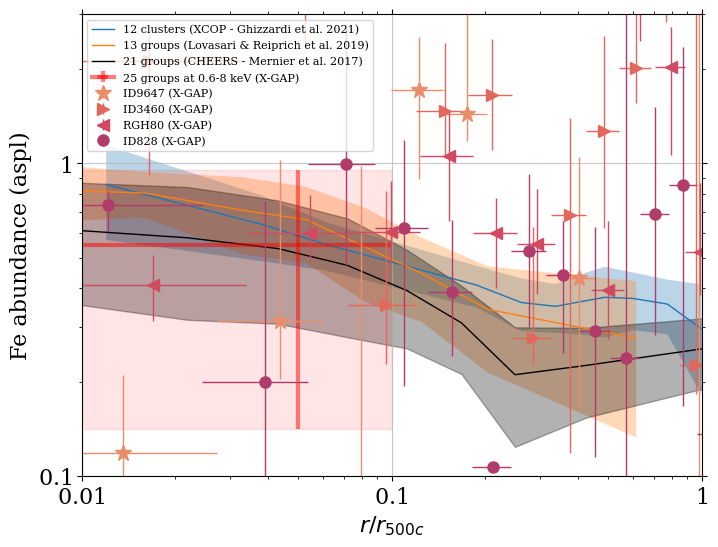

In [106]:
fig, ax = plt.subplots(figsize = (8,6))

# literatures
plt.plot(df_xcop['r'], df_xcop['Fe'], label = '12 clusters (XCOP - Ghizzardi et al. 2021)')
plt.fill_between(df_xcop['r'], df_xcop['Fe_lo'], df_xcop['Fe_hi'], alpha = 0.3)
plt.plot(df_lovasari['r'], df_lovasari['Fe'], label = '13 groups (Lovasari & Reiprich et al. 2019)')
plt.fill_between(df_lovasari['r'], df_lovasari['Fe_lo'], df_lovasari['Fe_hi'], alpha = 0.3)
plt.plot(df_cheers['r'], df_cheers['Fe'], c = 'k', label = '21 groups (CHEERS - Mernier et al. 2017)')
plt.fill_between(df_cheers['r'], df_cheers['Fe_lo'], df_cheers['Fe_hi'], color = 'k', alpha = 0.3)

# XGAP 0.1R500
# exclude bad fit
fil1 = abs(df_GD['cstat']/df_GD['dof'] - 1)<0.3

# exclude flared sources
flared = ['SDSSTG22635', 'SDSSTG1695', 'SDSSTG15776', 'SDSSTG35976', 'SDSSTG4047', 'SDSSTG3513']
fil2 = fil1 & (~np.isin(df_GD['reg'], flared))
print(np.sum(fil3))

# exclude insane values
fil3 = fil2 & (df_GD['Z-value'] < 5) 
print(np.sum(fil3))

temp_lo = [0.6]
temp_hi = [8]
Zwei_lst = []
Zvar_lst = []

for i in range(len(temp_lo)):
    fil = fil3 & (df_Tavg['Tavg']<temp_hi[i]) & (df_Tavg['Tavg']>temp_lo[i])
    
    yerr = np.max([df_GD['Z-errlo'][fil], df_GD['Z-errhi'][fil]], axis=0)
    print(Zwei)
    # Zwei = np.sum(df_GD['Z-value'][fil] * 1/yerr**2) / np.sum(1/yerr**2)
    Zwei = np.median(df_GD['Z-value'][fil])

    yerr1 = np.where(df_GD['Z-errlo'][fil]<10, df_GD['Z-errlo'][fil], 0)
    yerr2 = np.where(df_GD['Z-errhi'][fil]<10, df_GD['Z-errhi'][fil], 0)
    yerr = np.mean([yerr1, yerr2], axis=0)
    
    Zvar = np.sqrt(np.sum((df_GD['Z-value'][fil] - Zwei)**2/(np.sum(fil)-1))-np.median(yerr)**2)
    print(f"Intrinsic scatter, var, staterr {Zvar}, {np.sum((df_GD['Z-value'][fil] - Zwei)**2/(np.sum(fil)-1))}, {np.mean(yerr)**2}")
    print(Zwei, Zvar, np.sum(fil))
    print(df_GD['Z-value'][fil])
    Zwei_lst.append(Zwei)
    Zvar_lst.append(Zvar)
    plt.fill_between([0,0.1], y1 = Zwei-Zvar, y2 = Zwei+Zvar, color = 'r',  alpha = 0.1)
    plt.errorbar(0.05, Zwei, xerr = 0.05, yerr = Zvar, label = f'{np.sum(fil)} groups at {temp_lo[i]}-{temp_hi[i]} keV (X-GAP)', color = 'r', alpha = 0.5, linewidth = 3)
    chi = np.sqrt(np.sum((df_GD['Z-value'][fil] - Zwei)**2)/Zwei)
    print(f'chi is {chi}')


# XGAP 4 profiles
import seaborn as sns
cb = sns.color_palette("flare").as_hex()
rmean = np.mean(np.array([prof_9647['rlo'], prof_9647['rhi']]), axis = 0)/r500_dict['ID9647']
rerr = (prof_9647['rhi'] - prof_9647['rlo'])/r500_dict['ID9647']/2
plt.errorbar(rmean, prof_9647['Z-value'], xerr = rerr, yerr = [prof_9647['Z-errlo'], prof_9647['Z-errhi']], color = cb[0], fmt = '*', markersize = 12, label = 'ID9647 (X-GAP)')
rmean = np.mean(np.array([prof_3460['rlo'], prof_3460['rhi']]), axis = 0)/r500_dict['ID3460']
rerr = (prof_3460['rhi'] - prof_3460['rlo'])/r500_dict['ID3460']/2
plt.errorbar(rmean, prof_3460['Z-value'], xerr = rerr, yerr = [prof_3460['Z-errlo'], prof_3460['Z-errhi']], color = cb[1], fmt = '>',markersize = 8, label = 'ID3460 (X-GAP)')
rmean = np.mean(np.array([prof_80['rlo'], prof_80['rhi']]), axis = 0)/r500_dict['RGH80']
rerr = (prof_80['rhi'] - prof_80['rlo'])/r500_dict['RGH80']/2
plt.errorbar(rmean, prof_80['Z-value'], xerr = rerr, yerr = [prof_80['Z-errlo'], prof_80['Z-errhi']],  color = cb[2], fmt = '<', markersize = 8, label = 'RGH80 (X-GAP)')
rmean = np.mean(np.array([prof_828['rlo'], prof_828['rhi']]), axis = 0)/r500_dict['ID828']
rerr = (prof_828['rhi'] - prof_828['rlo'])/r500_dict['ID828']/2
plt.errorbar(rmean, prof_828['Z-value'], xerr = rerr, yerr = [prof_828['Z-errlo'], prof_828['Z-errhi']], color = cb[3], fmt = 'o', markersize = 8, label = 'ID828 (X-GAP)')




plt.ylim(0.1,3)
plt.xlim(0.01,1)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('$r/r_{500c}$')
plt.ylabel('Fe abundance (aspl)')
plt.legend(fontsize = 8)

# 2 cstat profiles